In [2]:
#Carga de librerías#
import pandas as pd
import numpy as np
import geopandas as gdp
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
# otras librerias
from datetime import datetime
import matplotlib.pyplot as matplt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)

In [3]:
#Lee el archivo...
data_BESS_and_solar = pd.read_csv("Grid_and_zero_csv/BESS_and_wind.csv",sep = ";")# error_bad_lines=False)

#visualización de las columnas:
print("Columnas: \n",data_BESS_and_solar.columns)

print("\n")
#veamos las empresas:
print("Empresas con sistemas BESS + WIND (Híbrido):\n",data_BESS_and_solar['Empresa Solicitante'].unique())


data_BESS_and_solar.dtypes

Columnas: 
 Index(['Index', 'Id', 'Proyecto', 'NUP', 'Empresa Solicitante', 'Tipo',
       'Estado Solicitud', 'Fecha Recepción', 'Capacidad [MW]',
       'Tipo Proyecto', 'Sólo BESS', 'BESS+Solar', 'BESS+Eólico',
       'Capacidad BESS (MW)', 'Cap. BESS + Solar (MWh)',
       'Cap. BESS+ Eolico (MWh)', 'Número de Hrs almacenamiento',
       'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión',
       'Fecha emisión informe definitivo',
       'Plazo obtención declaración en const',
       'Prórroga plazo obtención declaración en const.'],
      dtype='object')


Empresas con sistemas BESS + WIND (Híbrido):
 ['Colbún S.A.' 'Sierra Esperanza SpA' 'Parque Eólico Carica SpA'
 'Engie Energía Chile S.A. ' 'Trivento SpA' 'EBCO Energía S.A.'
 'Guanaquiana SpA']


Index                                               int64
Id                                                  int64
Proyecto                                           object
NUP                                                 int64
Empresa Solicitante                                object
Tipo                                               object
Estado Solicitud                                   object
Fecha Recepción                                    object
Capacidad [MW]                                      int64
Tipo Proyecto                                      object
Sólo BESS                                          object
BESS+Solar                                         object
BESS+Eólico                                        object
Capacidad BESS (MW)                               float64
Cap. BESS + Solar (MWh)                           float64
Cap. BESS+ Eolico (MWh)                           float64
Número de Hrs almacenamiento                      float64
Fecha Estimada

In [51]:
data_BESS_and_solar.columns

data_BESS_and_solar_filtrada = data_BESS_and_solar[["Index","Proyecto","Empresa Solicitante","Tipo","Estado Solicitud",
                               "Fecha Recepción","Capacidad [MW]",
                                'Capacidad BESS (MW)', 'Cap. BESS+ Eolico (MWh)',
                                'Número de Hrs almacenamiento','Fecha Estimada Conexión',
                                'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión']]

data_BESS_and_solar_filtrada.head(15)
guarda_df_data_BESS_and_solar_filtrada = data_BESS_and_solar_filtrada.to_csv("Grid_and_zero_csv/output_data_BESS_and_wind_filtrada.csv")
guarda_df_data_BESS_and_solar_filtrada

In [6]:
#Datos a analizar:
#numero de proyectos que posee cada empresa solicitantes.
#capacidad instalada de almacenamiento BESS x Región.
#Como se distribuyen los proyectos en las regiones.
# Número de horas de las baterias de almacenamiento!.

# 1. Número de proyectos que posee cada empresa solicitante y capacidad de almacenamiento BESS (MW)

In [8]:
proyectos_por_empresa = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Proyecto"].count()
print("Total de proyectos BESS+Wind:",proyectos_por_empresa.sum())
proyectos_por_empresa

#1/7*100

Total de proyectos BESS+Wind: 7


Empresa Solicitante
Colbún S.A.                  1
EBCO Energía S.A.            1
Engie Energía Chile S.A.     1
Guanaquiana SpA              1
Parque Eólico Carica SpA     1
Sierra Esperanza SpA         1
Trivento SpA                 1
Name: Proyecto, dtype: int64

Empresa con mayor número de BESS+Wind:
1. empate all = 1 proyecto BESS+Wind


In [ ]:
#Capacidad de almacenamiento por empresa:

In [9]:
capacidad_almacenamiento_por_empresa = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Capacidad [MW]"].sum()
capacidad_almacenamiento_por_empresa

Empresa Solicitante
Colbún S.A.                  400
EBCO Energía S.A.            200
Engie Energía Chile S.A.     400
Guanaquiana SpA              334
Parque Eólico Carica SpA      85
Sierra Esperanza SpA         200
Trivento SpA                 410
Name: Capacidad [MW], dtype: int64

In [ ]:
#Obs: Capacidad instalada de plantas híbridas!, es decir, capacidad MW 
#considera plantas BESS+ Planta Wind. 
#Veamos cuanto es la cap. de sólo las BESS de estas plantas híbridas.

In [10]:
#Capacidad de almacenamiento por empresa (Sólo la capacidad instalada de BESS)
capacidad_almacenamiento_por_empresa_2 = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Capacidad BESS (MW)"].sum()
print("Capacidad BESS que se incorpora de las plantas híbridas (BESS+Wind):",capacidad_almacenamiento_por_empresa_2.sum())
capacidad_almacenamiento_por_empresa_2

Capacidad BESS que se incorpora de las plantas híbridas (BESS+Wind): 133.0


Empresa Solicitante
Colbún S.A.                   0.0
EBCO Energía S.A.             0.0
Engie Energía Chile S.A.     63.0
Guanaquiana SpA              70.0
Parque Eólico Carica SpA      0.0
Sierra Esperanza SpA          0.0
Trivento SpA                  0.0
Name: Capacidad BESS (MW), dtype: float64

In [ ]:
#Obs: No todas las plantas Híbridas (BESS+Wind) informan la capacidad de BESS/Cap. Wind, por lo 
#que el análisis es representativo de sólo las plantas que informan sus capacidades.

In [11]:
data_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada["Capacidad BESS (MW)"]> 0 ]
#Reset index:
data_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar_filtrada_cap_informada.reset_index(drop=True)

print("Número de proyectos que informan su cap. BESS+ Wind:",data_BESS_and_solar_filtrada_cap_informada['Proyecto'].count())
print("Total de proyectos BESS+Wind:",proyectos_por_empresa.sum())
print("Porcentaje que informa:",
      (data_BESS_and_solar_filtrada_cap_informada['Proyecto'].count()/proyectos_por_empresa.sum())*100,"%")

Número de proyectos que informan su cap. BESS+ Wind: 2
Total de proyectos BESS+Wind: 7
Porcentaje que informa: 28.57142857142857 %


In [12]:
#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_numero_proyectos_por_empresa = pd.DataFrame(proyectos_por_empresa)

#DF capacidad instalada almacenamiento por empresa:
df_capacidad_almacenamiento_por_empresa = pd.DataFrame(capacidad_almacenamiento_por_empresa)

#Merge de los datos:
df_merge_datos_1 = pd.merge(df_numero_proyectos_por_empresa,
                            df_capacidad_almacenamiento_por_empresa,
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')


df_merge_datos_1.rename(columns={"Proyecto": "Número de proyectos BESS + Wind"},inplace = True)

#df_merge_datos_1['Capacidad [MW]'].sum()

#mayor capacidad instalada: 
mayor_capacidad = df_merge_datos_1.sort_values('Capacidad [MW]',ascending=False)
print("capacidad instalada total:",mayor_capacidad["Capacidad [MW]"].sum())

mayor_capacidad

capacidad instalada total: 2029


,Número de proyectos BESS + Wind,Capacidad [MW]
Empresa Solicitante,,
Trivento SpA,1,410
Colbún S.A.,1,400
Engie Energía Chile S.A.,1,400
Guanaquiana SpA,1,334
EBCO Energía S.A.,1,200
Sierra Esperanza SpA,1,200
Parque Eólico Carica SpA,1,85


In [13]:
#Observaciones:
#Empresa con mayor número de BESS+Wind:

#1.Empate = all tienen 1 proyecto.

#Total número de proyectos = 7.

#Empresa con mayor capacidad instalada BESS +Wind (MW):
#1.Trivento SpA = 410 MW
#2.Colbún S.A. = 400 MW.
#3.Engie Energía Chile S.A. = 400 MW.

In [15]:
#Mismo análisis pero con los proyectos que si informan su cap. Bess+Wind.

In [16]:
#Capacidad de almacenamiento por empresa considerando sólo BESS y excluyendo Solar.
data_BESS_and_solar_filtrada_cap_informada.head(1)
#Capacidad de almacenamiento por empresa (Sólo la capacidad instalada de BESS)
capacidad_almacenamiento_por_empresa_2 = data_BESS_and_solar_filtrada_cap_informada.groupby(["Empresa Solicitante"])["Capacidad BESS (MW)"].sum()
print("Capacidad BESS que se incorpora de las plantas híbridas (BESS+Wind):",capacidad_almacenamiento_por_empresa_2.sum())
capacidad_almacenamiento_por_empresa_2

#Número de proyectos por empresa que informan.
proyectos_por_empresa = data_BESS_and_solar_filtrada_cap_informada.groupby(["Empresa Solicitante"])["Proyecto"].count()
print("Total de proyectos BESS+Wind Informados:",proyectos_por_empresa.sum())
proyectos_por_empresa


Capacidad BESS que se incorpora de las plantas híbridas (BESS+Wind): 133.0
Total de proyectos BESS+Wind Informados: 2


Empresa Solicitante
Engie Energía Chile S.A.     1
Guanaquiana SpA              1
Name: Proyecto, dtype: int64

In [60]:
#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_numero_proyectos_por_empresa = pd.DataFrame(proyectos_por_empresa)

#DF capacidad instalada almacenamiento por empresa:
df_capacidad_almacenamiento_por_empresa = pd.DataFrame(capacidad_almacenamiento_por_empresa_2)

#Merge de los datos:
df_merge_datos_1 = pd.merge(df_numero_proyectos_por_empresa,
                            df_capacidad_almacenamiento_por_empresa,
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')


df_merge_datos_1.rename(columns={"Proyecto": "Número de proyectos BESS + Wind"},inplace = True)

#df_merge_datos_1['Capacidad [MW]'].sum()
df_merge_datos_1
#mayor capacidad instalada: 
mayor_capacidad = df_merge_datos_1.sort_values('Capacidad BESS (MW)',ascending=False)
print("capacidad instalada total:",mayor_capacidad["Capacidad BESS (MW)"].sum())
mayor_capacidad

#guarda el df para posterior análisis:
guarda_df_proyectos_capacidad_BESS_BESS_solar = mayor_capacidad.to_csv("Grid_and_zero_csv/output_df_proyectos_capacidad_BESS_BESS_wind.csv")
guarda_df_proyectos_capacidad_BESS_BESS_solar
mayor_capacidad

capacidad instalada total: 133.0


,Número de proyectos BESS + Wind,Capacidad BESS (MW)
Empresa Solicitante,,
Guanaquiana SpA,1,70.0
Engie Energía Chile S.A.,1,63.0


In [18]:
#Observaciones:
#Empresa con mayor número de BESS+Wind:

#1.Guanaquiana SpA = 1 PROYECTOS BESS+Wind
#2.Engie Energía Chile S.A. = 1 PROYECTOS BESS+Wind
#Total número de proyectos = 2.

#Empresa con mayor capacidad instalada BESS (MW):
#1.Guanaquiana SpA = 70 WM
#2.Engie Energía Chile S.A. =  63 MW


## 2. Como se distribuyen los proyectos en las regiones.

In [19]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna = data_BESS_and_solar_filtrada.groupby(["Región", "Comuna","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_comuna

Región       Comuna        Capacidad [MW]  Empresa Solicitante      
Antofagasta  Taltal        400             Engie Energía Chile S.A.     1
Atacama      Vallenar      400             Colbún S.A.                  1
Coquimbo     La Higuera    200             Sierra Esperanza SpA         1
                           334             Guanaquiana SpA              1
             Ovalle        85              Parque Eólico Carica SpA     1
                           410             Trivento SpA                 1
Valparaiso   Viña del Mar  200             EBCO Energía S.A.            1
Name: Proyecto, dtype: int64

In [20]:
#Como se distribuyen los proyectos en las regiones.
distribucion_region = data_BESS_and_solar_filtrada.groupby(["Región","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_region

Región       Capacidad [MW]  Empresa Solicitante      
Antofagasta  400             Engie Energía Chile S.A.     1
Atacama      400             Colbún S.A.                  1
Coquimbo     85              Parque Eólico Carica SpA     1
             200             Sierra Esperanza SpA         1
             334             Guanaquiana SpA              1
             410             Trivento SpA                 1
Valparaiso   200             EBCO Energía S.A.            1
Name: Proyecto, dtype: int64

In [21]:
#capacidad instalada de almacenamiento BESS+Solar x Región
analisis_region = data_BESS_and_solar_filtrada.groupby(["Región"])["Capacidad [MW]"].sum()
analisis_region
#Transforma el groupby en un dataframe:
#DF capacidad instalada por región:
df_capacidad = pd.DataFrame(analisis_region)
df_capacidad

# número de proyectos por región 
numero_empresas_por_region = data_BESS_and_solar_filtrada.groupby(["Región"])['Empresa Solicitante'].count()
numero_empresas_por_region
#Transforma el groupby en un dataframe:
#Número de empresas que instalaron BESS por región.
df = pd.DataFrame(numero_empresas_por_region)

#Une los 2 dataframe (capacidad instalda región + número de proyectos región)
df_merge_datos = pd.merge(df_capacidad, df, left_on='Región', right_on='Región')
#Cambia el nombre a la columna
df_merge_datos.rename(columns={"Empresa Solicitante": "Número de proyectos BESS + Wind"},inplace = True)
df_merge_datos
#Ordena el orden de las columnas que entregan la información.
data_ordenada = df_merge_datos[["Número de proyectos BESS + Wind","Capacidad [MW]"]]

#mayor capacidad instalada: 
#Ordena la información de forma descendente en función de la capacidad instalada.
capacidad_instalada_por_region = data_ordenada.sort_values('Capacidad [MW]',ascending=False)
capacidad_instalada_por_region

,Número de proyectos BESS + Wind,Capacidad [MW]
Región,,
Coquimbo,4,1029
Antofagasta,1,400
Atacama,1,400
Valparaiso,1,200


### Mismo análisis, pero con los datos informados de cap. BESS + Solar.

In [22]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región", "Comuna","Capacidad [MW]","Capacidad BESS (MW)","Empresa Solicitante"])["Proyecto"].count()
distribucion_comuna

Región       Comuna      Capacidad [MW]  Capacidad BESS (MW)  Empresa Solicitante      
Antofagasta  Taltal      400             63.0                 Engie Energía Chile S.A.     1
Coquimbo     La Higuera  334             70.0                 Guanaquiana SpA              1
Name: Proyecto, dtype: int64

In [23]:
#Como se distribuyen los proyectos en las regiones.
distribucion_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región","Capacidad [MW]","Capacidad BESS (MW)","Empresa Solicitante"])["Proyecto"].count()
distribucion_region

Región       Capacidad [MW]  Capacidad BESS (MW)  Empresa Solicitante      
Antofagasta  400             63.0                 Engie Energía Chile S.A.     1
Coquimbo     334             70.0                 Guanaquiana SpA              1
Name: Proyecto, dtype: int64

In [24]:
#capacidad instalada de almacenamiento BESS+Solar x Región
analisis_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])["Capacidad BESS (MW)"].sum()
analisis_region
#Transforma el groupby en un dataframe:
#DF capacidad instalada por región:
df_capacidad = pd.DataFrame(analisis_region)
df_capacidad

# número de proyectos por región 
numero_empresas_por_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])['Empresa Solicitante'].count()
numero_empresas_por_region
#Transforma el groupby en un dataframe:
#Número de empresas que instalaron BESS por región.
df = pd.DataFrame(numero_empresas_por_region)

#Une los 2 dataframe (capacidad instalda región + número de proyectos región)
df_merge_datos = pd.merge(df_capacidad, df, left_on='Región', right_on='Región')
#Cambia el nombre a la columna
df_merge_datos.rename(columns={"Empresa Solicitante": "Número de proyectos BESS + Wind"},inplace = True)
df_merge_datos
#Ordena el orden de las columnas que entregan la información.
data_ordenada = df_merge_datos[["Número de proyectos BESS + Wind","Capacidad BESS (MW)"]]

#mayor capacidad instalada: 
#Ordena la información de forma descendente en función de la capacidad instalada.
capacidad_instalada_por_region = data_ordenada.sort_values('Capacidad BESS (MW)',ascending=False)
capacidad_instalada_por_region

,Número de proyectos BESS + Wind,Capacidad BESS (MW)
Región,,
Coquimbo,1,70.0
Antofagasta,1,63.0


In [25]:
#Obs:
#Mayor capacidad instalada de BESS al norte del país.
#Región con mayor capacidad BESS: 
#1. Coquimbo: 70 MW.
#2. Antofagasta: 63 MW.

# 3. Análisis estadístico de los proyectos en las regiones.

In [26]:
#Visualización del dataframe filtrado:
print("Columnas :\n ",data_BESS_and_solar_filtrada.columns)


Columnas :
  Index(['Index', 'Proyecto', 'Empresa Solicitante', 'Tipo', 'Estado Solicitud',
       'Fecha Recepción', 'Capacidad [MW]', 'Capacidad BESS (MW)',
       'Cap. BESS+ Eolico (MWh)', 'Número de Hrs almacenamiento',
       'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión'],
      dtype='object')


In [27]:
#Regiones que poseen BESS
data_BESS_and_solar_filtrada['Región'].unique()

regiones_con_BESS_and_solar = data_BESS_and_solar_filtrada['Región'].unique()
regiones_con_BESS_and_solar
lista_Regiones_BESS_and_solar = regiones_con_BESS_and_solar.tolist()
lista_Regiones_BESS_and_solar

['Atacama', 'Coquimbo', 'Antofagasta', 'Valparaiso']

In [29]:
#Atacama
BESS_and_solar_R_atacama = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[0]]
#Reset index:
BESS_and_solar_R_atacama = BESS_and_solar_R_atacama.reset_index(drop=True)
#Coquimbo
BESS_and_solar_R_coquimbo = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[1]]
#Reset index:
BESS_and_solar_R_coquimbo = BESS_and_solar_R_coquimbo.reset_index(drop=True)
#Antofagasta
BESS_and_solar_R_antofagasta = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[2]]
#Reset index:
BESS_and_solar_R_antofagasta = BESS_and_solar_R_antofagasta.reset_index(drop=True)
#Valparaiso
BESS_and_solar_R_valparaiso = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[3]]
#Reset index:
BESS_and_solar_R_valparaiso = BESS_and_solar_R_valparaiso.reset_index(drop=True)


In [30]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna_agregado = data_BESS_and_solar_filtrada.groupby(["Región", "Comuna"])["Capacidad BESS (MW)"].sum()
distribucion_comuna_agregado

Región       Comuna      
Antofagasta  Taltal          63.0
Atacama      Vallenar         0.0
Coquimbo     La Higuera      70.0
             Ovalle           0.0
Valparaiso   Viña del Mar     0.0
Name: Capacidad BESS (MW), dtype: float64

In [31]:
#Mismo análisis pero para las plantas que SI informan.

In [32]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna_agregado = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región", "Comuna"])["Capacidad BESS (MW)"].sum()
distribucion_comuna_agregado

Región       Comuna    
Antofagasta  Taltal        63.0
Coquimbo     La Higuera    70.0
Name: Capacidad BESS (MW), dtype: float64

In [33]:
#DF distribución general regiones:
distribucion_general_regiones = np.round(data_BESS_and_solar_filtrada['Capacidad BESS (MW)'].describe(),decimals = 2)
df_distribucion_general_regiones = pd.DataFrame(distribucion_general_regiones)

#Rename:
df_distribucion_general_regiones.rename(columns={"Capacidad BESS (MW)": "BESS+Wind distribution in all regions"},inplace = True)

df_distribucion_general_regiones
#Incorpora las demás regiones en el df_distribucion_general_regiones:
#Valparaiso
#Antofagasta:
df_distribucion_general_regiones['Distribution Antofagasta'] = np.round(BESS_and_solar_R_antofagasta['Capacidad BESS (MW)'].describe(),decimals = 2)
#Coquimbo:
df_distribucion_general_regiones['Distribution Coquimbo'] = np.round(BESS_and_solar_R_coquimbo['Capacidad BESS (MW)'].describe(),decimals = 2)

df_distribucion_general_regiones


,BESS+Wind distribution in all regions,Distribution Antofagasta,Distribution Coquimbo
count,2.00,1.0,1.0
mean,66.50,63.0,70.0
std,4.95,NaN,NaN
min,63.00,63.0,70.0
25%,64.75,63.0,70.0
50%,66.50,63.0,70.0
75%,68.25,63.0,70.0
max,70.00,63.0,70.0


Text(0.5, 1.0, "BESS+Wind infrastructure, Chile's regions")

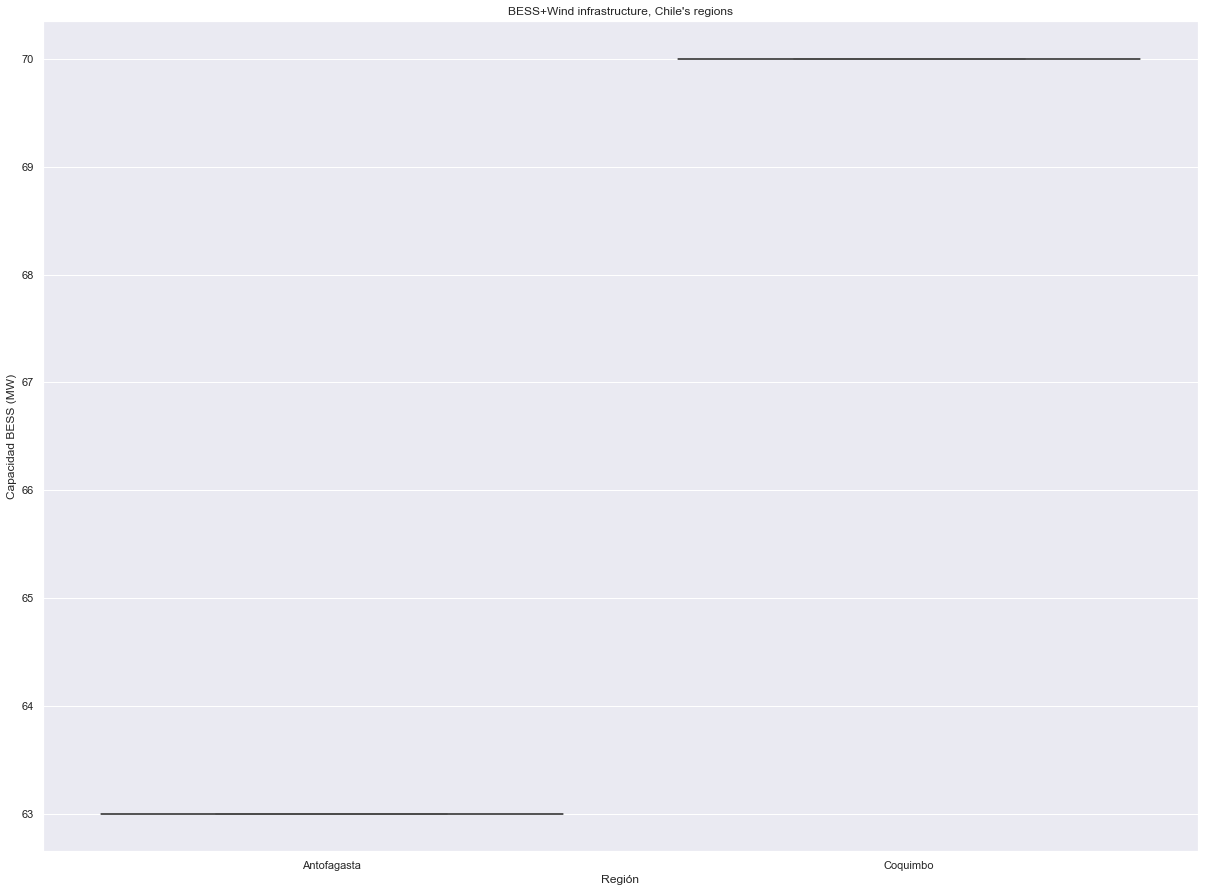

In [34]:
sns.set_style('whitegrid')

sns.set(rc={'figure.figsize':(20.7,15.27)}) #set width and height

ax = sns.boxplot(x='Región',y='Capacidad BESS (MW)',
                data=data_BESS_and_solar_filtrada_cap_informada)

ax.set_title("BESS+Wind infrastructure, Chile's regions")

In [37]:
# número de Horas de operación BESS 
#numero_empresas_por_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])['Empresa Solicitante'].count()
#numero_empresas_por_region
data_BESS_and_solar_filtrada_cap_informada['Número de Hrs almacenamiento']
#Número de horas de operación:
numero_horas_operacion = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región","Comuna","Número de Hrs almacenamiento"])['Empresa Solicitante'].count()
numero_horas_operacion


Región       Comuna      Número de Hrs almacenamiento
Antofagasta  Taltal      6.00                            1
Coquimbo     La Higuera  4.77                            1
Name: Empresa Solicitante, dtype: int64

In [56]:
#promedio de duración de las baterías:
#promedio_horas_operacion = [c.replace(',', '.') for c in data_BESS_and_solar_filtrada_cap_informada['Número de Hrs almacenamiento']]
#promedio_horas_operacion_final = [float(c) for c in promedio_horas_operacion]
promedio_horas_operacion_final = data_BESS_and_solar_filtrada_cap_informada['Número de Hrs almacenamiento']
len(promedio_horas_operacion_final)
valor_promedio_horas_operacion_BESS = sum(promedio_horas_operacion_final)/len(promedio_horas_operacion_final)
print("valor_promedio_horas_operacion_BESS Híbridas (Wind+BESS)",np.round(valor_promedio_horas_operacion_BESS,decimals = 2),"Hrs")
promedio_horas_operacion_final

valor_promedio_horas_operacion_BESS Híbridas (Wind+BESS) 5.38 Hrs


0    6.00
1    4.77
Name: Número de Hrs almacenamiento, dtype: float64

In [46]:
df_grafica_horas_operacion = data_BESS_and_solar_filtrada_cap_informada[["Comuna",
                                                                        "Número de Hrs almacenamiento"]]

In [47]:
df_grafica_horas_operacion

,Comuna,Número de Hrs almacenamiento
0,Taltal,6.00
1,La Higuera,4.77


In [48]:
df_grafica_horas_operacion
df_grafica_horas_operacion['number of hours of storage/discharge'] = promedio_horas_operacion_final
df_grafica_horas_operacion
dfi = df_grafica_horas_operacion[['Comuna','number of hours of storage/discharge']]
dfi

##dfi = df_grafica_horas_operacion.set_index('Región')
#dfi
dfi2 = dfi.set_index('Comuna')
dfi2
##mayor capacidad instalada: 
##dfi2 = df_grafica_horas_operacion.sort_values('Número de Hrs almacenamiento',ascending=False)
##dfi2

,number of hours of storage/discharge
Comuna,
Taltal,6.00
La Higuera,4.77


In [49]:
dfi2.iplot(kind = 'bar',#x = df_grafica_horas_operacion['Región'], 
                       #         y = df_grafica_horas_operacion['number of hours of storage/discharge'],        
           xTitle = 'commune',
             yTitle = "Number of Hrs storage",title = 'Storage time behavior by Commune Proyect BESS+Wind')#,
        #) 

In [50]:
puntos_conexion = data_BESS_and_solar_filtrada.groupby(["Región","Comuna","Punto de Conexión"])["Proyecto"].count()
puntos_conexion

Región       Comuna        Punto de Conexión                                  
Antofagasta  Taltal        Línea Lomas de Taltal - Parinas 1x220 kV               1
Atacama      Vallenar      S/E Don Héctor 220kV                                   1
Coquimbo     La Higuera    Deriv. Línea Punta Colorada - Tres Quebradas 220 kV    1
                           S/E Punta Colorada 220 kV                              1
             Ovalle        Linea 1 x 220 kV El Arrayán - Don Goyo                 1
                           S/E Don Goyo 220 kV                                    1
Valparaiso   Viña del Mar  S/E Agua Santa 110                                     1
Name: Proyecto, dtype: int64

In [55]:
#Extra:
data_BESS_and_solar
#Filtro de los datos que son informados (BESS+Solar:)
df_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar.loc[data_BESS_and_solar["Capacidad BESS (MW)"]> 0 ]
df_BESS_and_solar_filtrada_cap_informada

guarda_df_data_BESS_and_solar_filtrada = df_BESS_and_solar_filtrada_cap_informada.to_csv("Grid_and_zero_csv/output_data_BESS_and_wind_filtrada.csv")
guarda_df_data_BESS_and_solar_filtrada